In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy import stats
import seaborn as sns
sns.set()

# Data Source
https://www.weather.gov/fwd/d100data

In [13]:
df = pd.read_csv("dallas-climate.csv", index_col='Year')

df['Summer High [°F] / Date'] = df['Summer High [°F]']
df['Summer High [°F]'] = df['Summer High [°F] / Date'].map(
    lambda x: float(re.search("\d{2,3}", x)[0])
)

R-squared: 0.0588


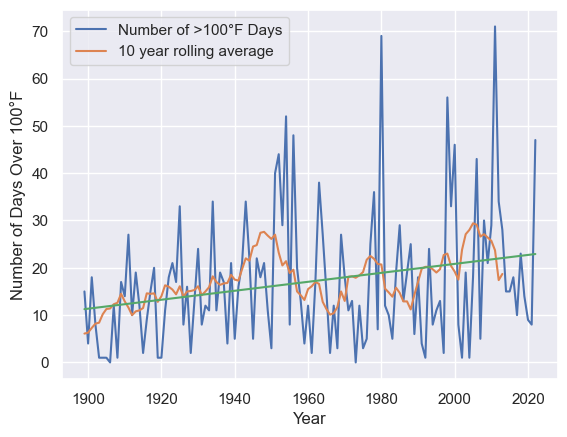

In [27]:
window = 10

res = stats.linregress(df.index, df['Number of >100°F Days'])
print(f"R-squared: {res.rvalue**2:.4f}")

ax = df['Number of >100°F Days'].plot()
ax.set_ylabel("Number of Days Over 100°F")
ax.plot(
    df['Number of >100°F Days'].rolling(window).mean(),
    label=f'{window} year rolling average',
)
ax.plot(
    df.index, 
    res.intercept + res.slope * df.index,
)
ax.legend()
plt.savefig("n100.svg")

R-squared: 0.0125


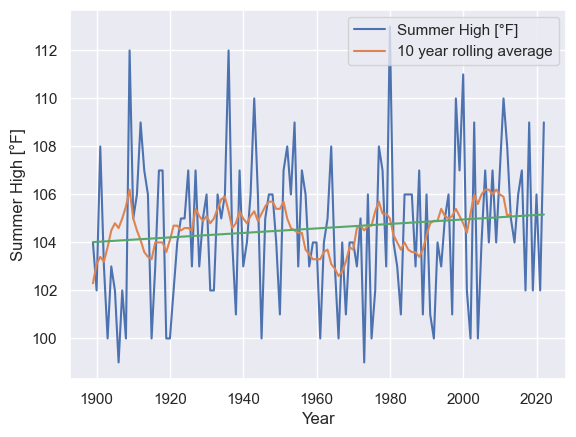

In [28]:
res = stats.linregress(df.index, df["Summer High [°F]"])
print(f"R-squared: {res.rvalue**2:.4f}")

ax = df['Summer High [°F]'].plot()
ax.set_ylabel("Summer High [°F]")
ax.plot(
    df['Summer High [°F]'].rolling(10,).mean(),
    label=f'{window} year rolling average',
)
ax.plot(
    df.index, 
    res.intercept + res.slope * df.index
)
ax.legend()
plt.savefig("summer highs.svg")